<a href="https://colab.research.google.com/github/lmcanavals/machine_learning/blob/main/0901_articifial_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


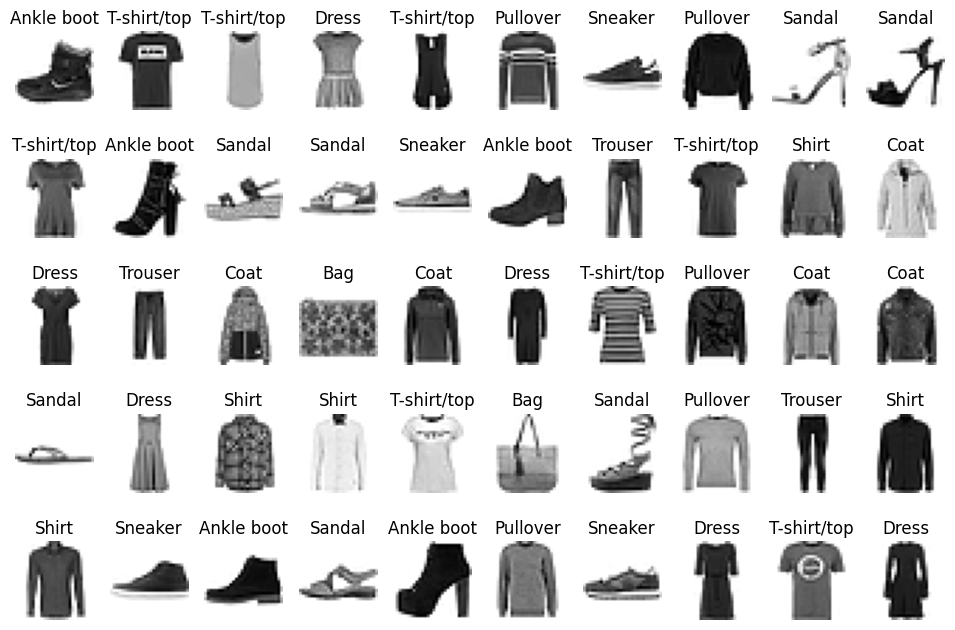

In [4]:
labels = ["T-shirt/top",
          "Trouser",
          "Pullover",
          "Dress",
          "Coat",
          "Sandal",
          "Shirt",
          "Sneaker",
          "Bag",
          "Ankle boot"]

fig = plt.figure(figsize=(12, 8))
for i in range(50):
    a = fig.add_subplot(5, 10, i+1)
    plt.axis('off')
    plt.imshow(x_train[i], cmap='gray_r')
    plt.title(labels[y_train[i]])

plt.show()

## The Artificial Neural Network (ANN)

In [5]:
x_train = x_train / 255.
x_test = x_test / 255.

In [6]:
def flatten(imgs):
    m, r, c = imgs.shape
    return imgs.reshape((m, r*c))

x_train = flatten(x_train)
x_test = flatten(x_test)

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
model = keras.Sequential([
    layers.Dense(64, input_dim=784, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 59850 (233.79 KB)
Trainable params: 59850 (233.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5008 - accuracy: 0.8224
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3694 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3370 - accuracy: 0.8759
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3171 - accuracy: 0.8831
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2972 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2827 - accuracy: 0.8947
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2711 - accuracy: 0.8986
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2621 - accuracy: 0.9022
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2496 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.242

In [ ]:
score = model.evaluate(x_test, y_test)

In [17]:
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

Test loss: 0.32417765259742737
Test accuracy: 0.8855000138282776


In [19]:
model2 = keras.Sequential([
    layers.Dense(32, input_dim=784, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(10, activation='softmax')])
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6115 - accuracy: 0.7807
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4272 - accuracy: 0.8498
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3904 - accuracy: 0.8594
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3638 - accuracy: 0.8676
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3464 - accuracy: 0.8743
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3350 - accuracy: 0.8764
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3237 - accuracy: 0.8807
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3160 - accuracy: 0.8841
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3087 - accuracy: 0.8863
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.302

In [21]:
score2 = model2.evaluate(x_test, y_test)
print(f"Test loss: {score2[0]}")
print(f"Test accuracy: {score2[1]}")

Test loss: 0.3725731670856476
Test accuracy: 0.8636000156402588


In [23]:
model3 = keras.Sequential([
    layers.Dense(64, input_dim=784, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')])
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7365 - accuracy: 0.7285
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5601 - accuracy: 0.7955
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5183 - accuracy: 0.8111
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4965 - accuracy: 0.8201
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4848 - accuracy: 0.8227
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4731 - accuracy: 0.8263
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4647 - accuracy: 0.8301
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4599 - accuracy: 0.8304
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4539 - accuracy: 0.8336
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.448

In [24]:
score3 = model3.evaluate(x_test, y_test)
print(f"Test loss: {score3[0]}")
print(f"Test accuracy: {score3[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 0.4275 - accuracy: 0.8521
Test loss: 0.427470862865448
Test accuracy: 0.8521000146865845


<ipython-input-30-6e7991180100>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


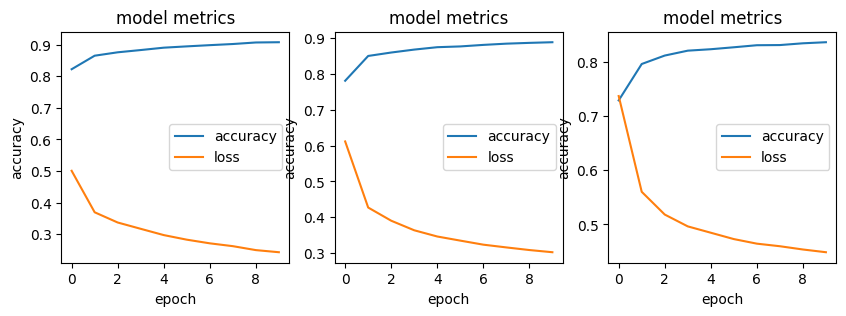

In [30]:
plt.subplots(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model metrics')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'])
plt.subplot(1, 3, 2)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['loss'])
plt.title('model metrics')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'])
plt.subplot(1, 3, 3)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['loss'])
plt.title('model metrics')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'])
plt.show()